# 1st Question

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
df = pd.read_csv("insurance.csv")

y1 = df['CARAVAN']
x1 = df.drop(['CARAVAN'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size = 0.2 , random_state = 1)

In [2]:
df['CARAVAN'].value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [3]:
cls = LogisticRegression(solver='liblinear')
cls.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [4]:
x = cls.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test,x[:,1], pos_label=1)
preds = x[:,1]
p_fpr, p_tpr, _ = roc_curve(y_test, preds, pos_label=1)

Area Under Curve is 0.7084681539509536


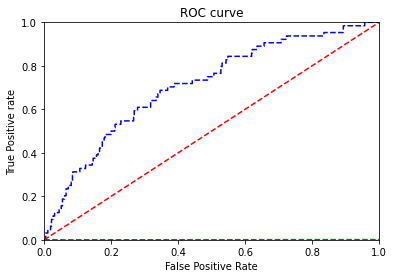

In [5]:
plt.plot(fpr,linestyle='--',color='green')
plt.plot(p_fpr,p_tpr,linestyle='--', color='blue')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
auc = roc_auc_score(y_test, x[:,1])
print("Area Under Curve is",auc)

# 4th Question

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline


df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names =["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])

#label_encoder = preprocessing.LabelEncoder()
#df['Class'] = label_encoder.fit_transform(df['Class'])
#df['Class'].unique()

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,4].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2 , random_state = 1)

In [8]:
ks_set = [1,2,3,5,10,15,20,25,30,35,40]
scores = []
for i in ks_set:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)
    #print(classification_report(y_test, y_pred))
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores

[1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

[0.040000000000000036, 0.053333333333333455, 0.033333333333333215, 0.026666666666666616, 0.019999999999999907, 0.033333333333333215, 0.040000000000000036, 0.040000000000000036, 0.060000000000000164, 0.046666666666666634, 0.07333333333333325]
Minimum error: 0.019999999999999907 at K = 4


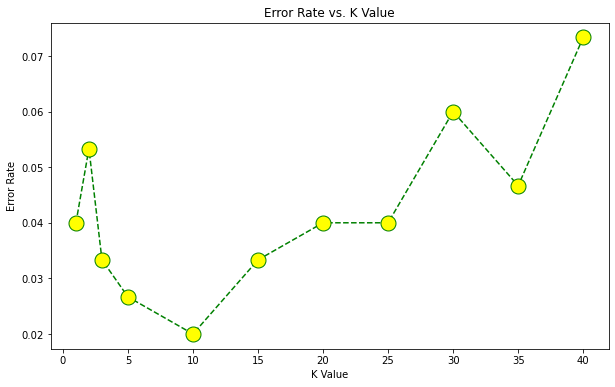

In [9]:
#K-fold cross validation and Best Case K value
k_scores=[]
for k in ks_set:
    knn_classifier1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier1, x, y, cv=5, scoring='accuracy')
    k_scores.append(1-(scores.mean()))
print(k_scores)
plt.figure(figsize=(10,6))
plt.plot(ks_set,k_scores,color='green', linestyle='dashed', 
         marker='o',markerfacecolor='yellow', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
print("Minimum error:",min(k_scores),"at K =",k_scores.index(min(k_scores)))

In [10]:
#Question 3.1

In [11]:
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("cereal.csv")
data = data[1:]
data.reset_index(drop=True, inplace=True)

data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [12]:
mu = 0
sigma = 5
sodium = list(data['sodium'].values)
sodium2 = [(2*int(sodium[i]))+int(np.random.normal(mu, sigma, 1)[0]) for i in range(data.shape[0])]
data.insert(7, "sodium2", sodium2, True)

In [13]:
data.drop(["name"], axis =1, inplace = True)

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
mfr_enc = OneHotEncoder()
mfr_df = pd.DataFrame(mfr_enc.fit_transform(data[['mfr']]).toarray())
mfr_columns = list(mfr_df.columns)
encoded_mfr_columns = []
for i in mfr_columns:
    encoded_mfr_columns.append("mfr_"+str(i))
mfr_df.set_axis(encoded_mfr_columns, axis=1, inplace=True)
data.drop(["mfr"],axis = 1,inplace = True)
data = data.join(mfr_df)

In [16]:
type_enc = OneHotEncoder()
type_df = pd.DataFrame(type_enc.fit_transform(data[['type']]).toarray())
type_columns = list(type_df.columns)
encoded_type_columns = []
for i in type_columns:
    encoded_type_columns.append("type_"+str(i))
type_df.set_axis(encoded_type_columns, axis=1, inplace=True)
data.drop(["type"],axis = 1,inplace = True)
data = data.join(type_df)

In [17]:
data = data.astype("float")

In [18]:
X = data.drop(['rating'],axis = 1)
y = data["rating"]

In [19]:
from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.1)

In [21]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [22]:
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)

Ridge()

In [23]:
import matplotlib.pyplot as plt

In [24]:
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)

Lasso()

In [25]:
model_elasticnet = ElasticNet()
model_elasticnet.fit(X_train,y_train)

ElasticNet()

In [26]:
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

In [27]:
#Question 3.2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, GridSearchCV, train_test_split, cross_val_score
ridge_model = GridSearchCV(Ridge(),{'alpha':[0.0001,0.0005,0.005,0.001,0.01,0.05,0.1,0.2,0.5,1]},
                         cv=5, scoring='r2')

In [28]:
ridge_model.fit(X,y)
score = pd.DataFrame(ridge_model.cv_results_).iloc[:,4:][['param_alpha','mean_test_score']]

Text(0, 0.5, 'R2')

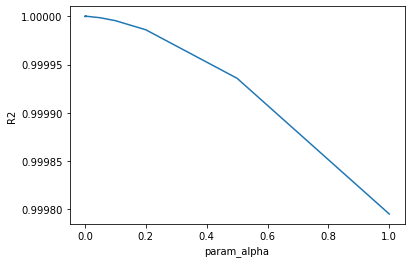

In [29]:
plt.plot(score['param_alpha'],score['mean_test_score'])
plt.xlabel("param_alpha")
plt.ylabel("R2")

In [30]:
#Question 3.3

In [31]:
# pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

In [32]:
ridge_mse, ridge_bias, ridge_var = bias_variance_decomp(model_ridge, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)
ridge_y_pred=model_ridge.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % ridge_mse)
print('Avg Bias: %.3f' % ridge_bias)
print('Avg Variance: %.3f' % ridge_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,ridge_y_pred))

MSE from bias_variance lib [avg expected loss]: 0.047
Avg Bias: 0.028
Avg Variance: 0.018
Mean Square error by Sckit-learn lib: 0.052


In [33]:
lasso_mse, lasso_bias, lasso_var = bias_variance_decomp(model_lasso, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)
lasso_y_pred=model_lasso.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % lasso_mse)
print('Avg Bias: %.3f' % lasso_bias)
print('Avg Variance: %.3f' % lasso_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,lasso_y_pred))

MSE from bias_variance lib [avg expected loss]: 5.592
Avg Bias: 3.945
Avg Variance: 1.647
Mean Square error by Sckit-learn lib: 3.755


In [34]:
elasticnet_mse, elasticnet_bias, elasticnet_var = bias_variance_decomp(model_elasticnet, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)
elasticnet_y_pred=model_elasticnet.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % elasticnet_mse)
print('Avg Bias: %.3f' % elasticnet_bias)
print('Avg Variance: %.3f' % elasticnet_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,elasticnet_y_pred))


MSE from bias_variance lib [avg expected loss]: 6.867
Avg Bias: 5.457
Avg Variance: 1.409
Mean Square error by Sckit-learn lib: 5.110


In [35]:
linear_mse, linear_bias, linear_var = bias_variance_decomp(model_linear, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)
linear_y_pred=model_linear.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % linear_mse)
print('Avg Bias: %.3f' % linear_bias)
print('Avg Variance: %.3f' % linear_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,linear_y_pred))

MSE from bias_variance lib [avg expected loss]: 0.000
Avg Bias: 0.000
Avg Variance: 0.000
Mean Square error by Sckit-learn lib: 0.000


In [36]:
#Question 2

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import log
df = pd.read_csv("cereal2.csv",sep=';')
df.head()
df = df.iloc[1: , :]
label_encoder = preprocessing.LabelEncoder()

df['name'] = label_encoder.fit_transform(df['name'])
df['name'].unique()
df['mfr'] = label_encoder.fit_transform(df['mfr'])
df['mfr'].unique()
df['type'] = label_encoder.fit_transform(df['type'])
df['type'].unique()
df['cups'] = label_encoder.fit_transform(df['cups'])
df['cups'].unique()
df['fiber'] = label_encoder.fit_transform(df['fiber'])
df['fiber'].unique()
df['carbo']= label_encoder.fit_transform(df['carbo'])
df['carbo'].unique()
df['weight']= label_encoder.fit_transform(df['weight'])
df['weight'].unique()

array([2, 5, 3, 4, 6, 0, 1])

In [55]:
y1=df['rating']

#Drop name and rating columns
x1=df.drop(columns=['rating','name'])

#spliting data
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [56]:
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred1 = reg.predict(X_test)
print("Predicted values using Linear Regression: ")
print(y_pred1)

Predicted values using Linear Regression: 
[32.09788505 49.94831229 40.36398858 63.30457014 44.04394415 58.22120222
 58.788498   56.43188237 31.27960412 38.84191079 38.49531109 57.81803049
 76.56400195 28.21907645 52.3603753  36.25439182]


In [57]:
y1=df['rating']

#Drop sodium and sugar columns
x2=x1.drop(columns=['sodium','sugars'])

#spliting data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y1, test_size = 0.2, random_state = 0)

In [58]:
#calculating aic
def calculating_aic(n, mse, n_params):
    aic = n * log(mse) + 2 * n_params
    return aic


# calculating bic
def calculating_bic(n, mse, n_params):
    bic = n * log(mse) + n_params * log(n)
    return bic

In [59]:
#2nd Model
reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

y_pred2 = reg2.predict(X_test2)
print("Predicted values using Linear Regression model2: ")
print(y_pred2)

Predicted values using Linear Regression model2: 
[30.93272705 53.06465429 39.29916123 56.2370112  38.19840115 55.14135986
 55.25107654 56.44100559 33.69369605 32.49695653 39.49020337 50.40049728
 68.49555518 30.04211364 48.36487214 34.52245826]


In [60]:
#calculating parameters for 1st model
mean_sq_err = mean_squared_error(y_test, y_pred1)
n=len(y_test)
num_params = len(reg.coef_) + 1
aic1 = calculating_aic(n, mean_sq_err, num_params)
bic1 = calculating_bic(n, mean_sq_err, num_params)
Adj_r21 = 1 - (1-r2_score(y_test, y_pred1)) * (len(y1)-1)/(len(y1)-x1.shape[1]-1)

In [61]:
#Calculating parameters for 2nd model
mean_sq_err = mean_squared_error(y_test2, y_pred2)
n=len(y_test2)
num_params = len(reg2.coef_) + 1
aic2 = calculating_aic(n, mean_sq_err, num_params)
bic2 = calculating_bic(n, mean_sq_err, num_params)
Adj_r22 = 1 - (1-r2_score(y_test2, y_pred2)) * (len(y1)-1)/(len(y1)-x2.shape[1]-1)

In [62]:
print('AIC1:', aic1)
print('AIC2:', aic2)
print('BIC1:', bic1)
print('Adjusted R2 1:', Adj_r21)
print('Adjusted R2 2:', Adj_r22)
print("Comapring values Model1 is better than Model2")

AIC1: 79.25424049918655
AIC2: 90.27219264452135
BIC1: 90.84307133278327
Adjusted R2 1: 0.891101287435763
Adjusted R2 2: 0.7303050464958811
Comapring values Model1 is better than Model2
